## Решающие деревья

Это логический алгоритм классификации, решающий задачи классификации и регрессии. Данный алгоритм представляет собой объединение логических условий в структуру дерева.

В зависимости от пространственной структуры данных, один типов моделей из них будет работать лучше:

* Если данные хорошо линейно разделимы,  то линейная модель;
* Если данные линейно неразделимы (присутствуют только кусочно-линейные или нелинейные зависимости), то решающие деревья.


### План семинара:

1. [Задачи](#tasks)
2. [Дерево решений](#decisiontree)
3. [Переобучение](#overfitting)
4. [Неустойчивость](#unstable)
5. [Пример на датасете](#dataset)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import pandas as pd

plt.rcParams["figure.figsize"] = (11, 6.5)

https://www.programcreek.com/python/example/82897/sklearn.datasets.load_boston

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]

In [ ]:
df.shape

(1012, 11)

### Дерево решений  <a name="decisiontree"></a>


Давайте сгенерируем пример линейно разделимой выборки для задачи бинарной классификации:

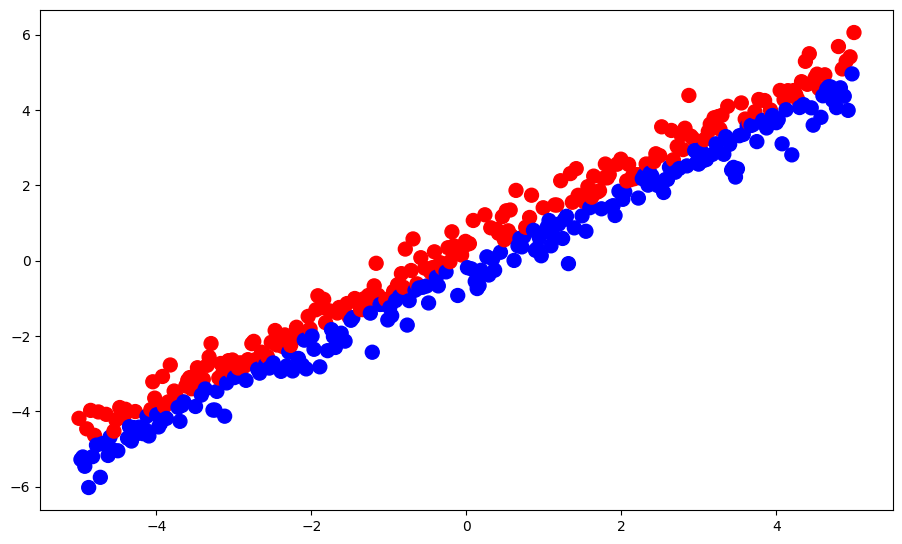

In [ ]:
n = 400
np.random.seed(1)
X = np.zeros((n, 2))
X[:, 0] = np.linspace(-5, 5, n)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)

plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='bwr')
plt.show()

Для удобства, напишем функцию для обучения классификатора и построения графика с разделяющей прямой.

In [ ]:
X.shape,y.shape

((400, 2), (400,))

https://stackoverflow.com/questions/75960845/plot-decision-regions-typeerror-axis-got-an-unexpected-keyword-argument-y-mi

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


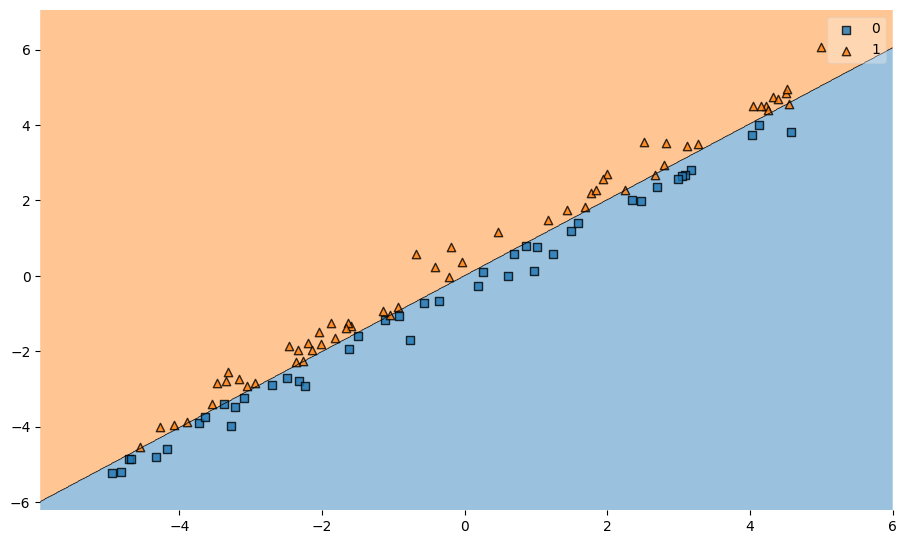

Accuracy: 0.98


In [ ]:
model=LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_decision_regions(X_test, y_test, model)
plt.show()
print(f"Accuracy: {accuracy_score(y_pred, y_test):.2f}")

In [ ]:
def train_model(model=LogisticRegression()):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_decision_regions(X_test, y_test, model)
    plt.show()

    print(f"Accuracy: {accuracy_score(y_pred, y_test):.2f}")

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


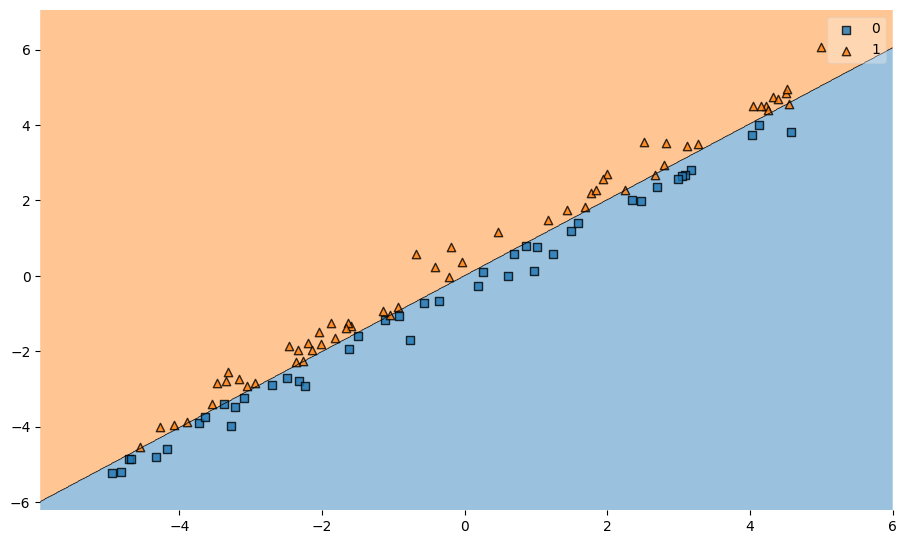

Accuracy: 0.98


In [ ]:
train_model(LogisticRegression())

Сравним качество, так ли хорошо получится решить эту задачу не логитической регрессией, а деревом решений на линейно разделимой выборке?

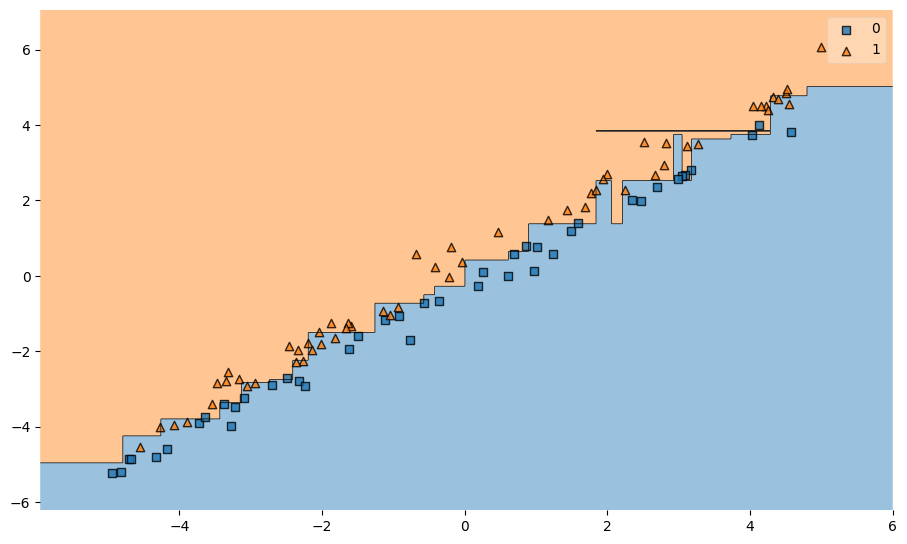

Accuracy: 0.74


In [ ]:
train_model(DecisionTreeClassifier(random_state=13))

Давайте вспомним, что такое логическое исключающее ИЛИ, и сгенерируем пример выборки.

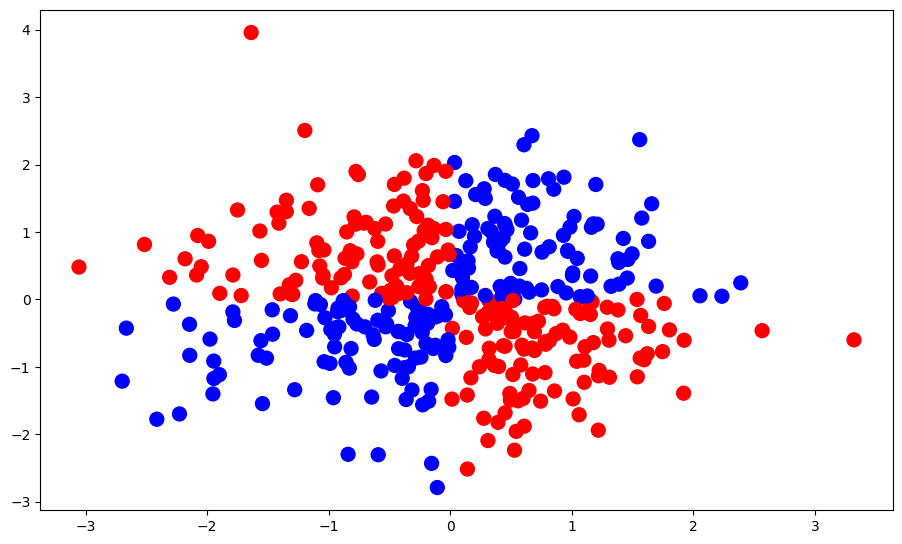

In [ ]:
X = np.random.randn(n, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

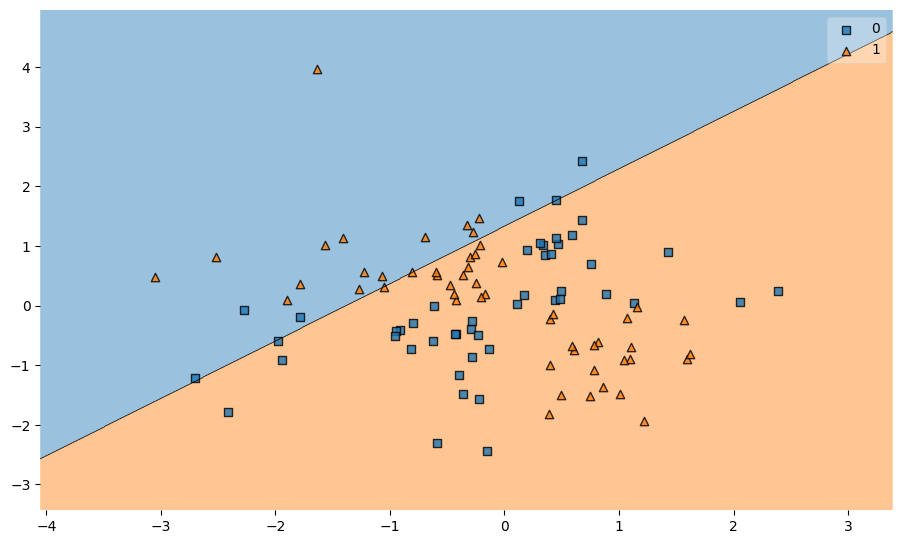

Accuracy: 0.43


In [ ]:
train_model(LogisticRegression())

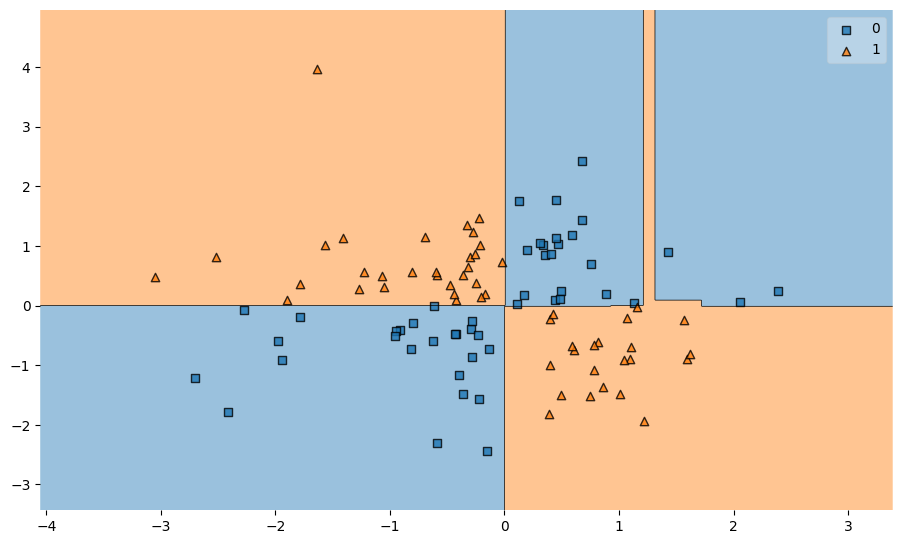

Accuracy: 1.00


In [ ]:
train_model(DecisionTreeClassifier())

### Переобучение <a name="overfitting"></a>

Решающие деревья могут переобучаться под любую выборку, если их не регуляризовать: при большом количестве листьев для каждого объекта может выделиться своя область в признаковом пространстве. Дерево просто выучивает обучающую выборку, но не выделяет закономерности в данных. Давайте убедимся в этом на практике.

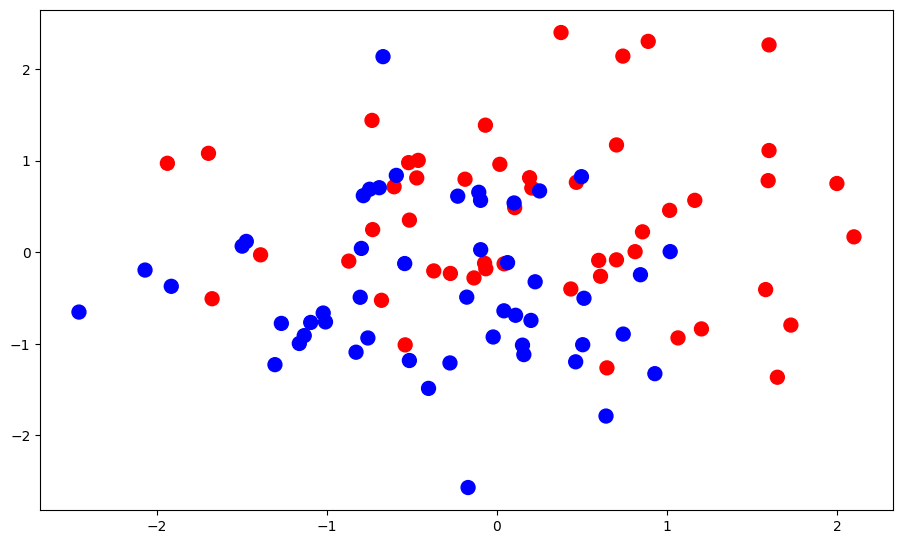

In [ ]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

Проверим, как разные значения гиперпараметров решающего дерева влияют на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листом

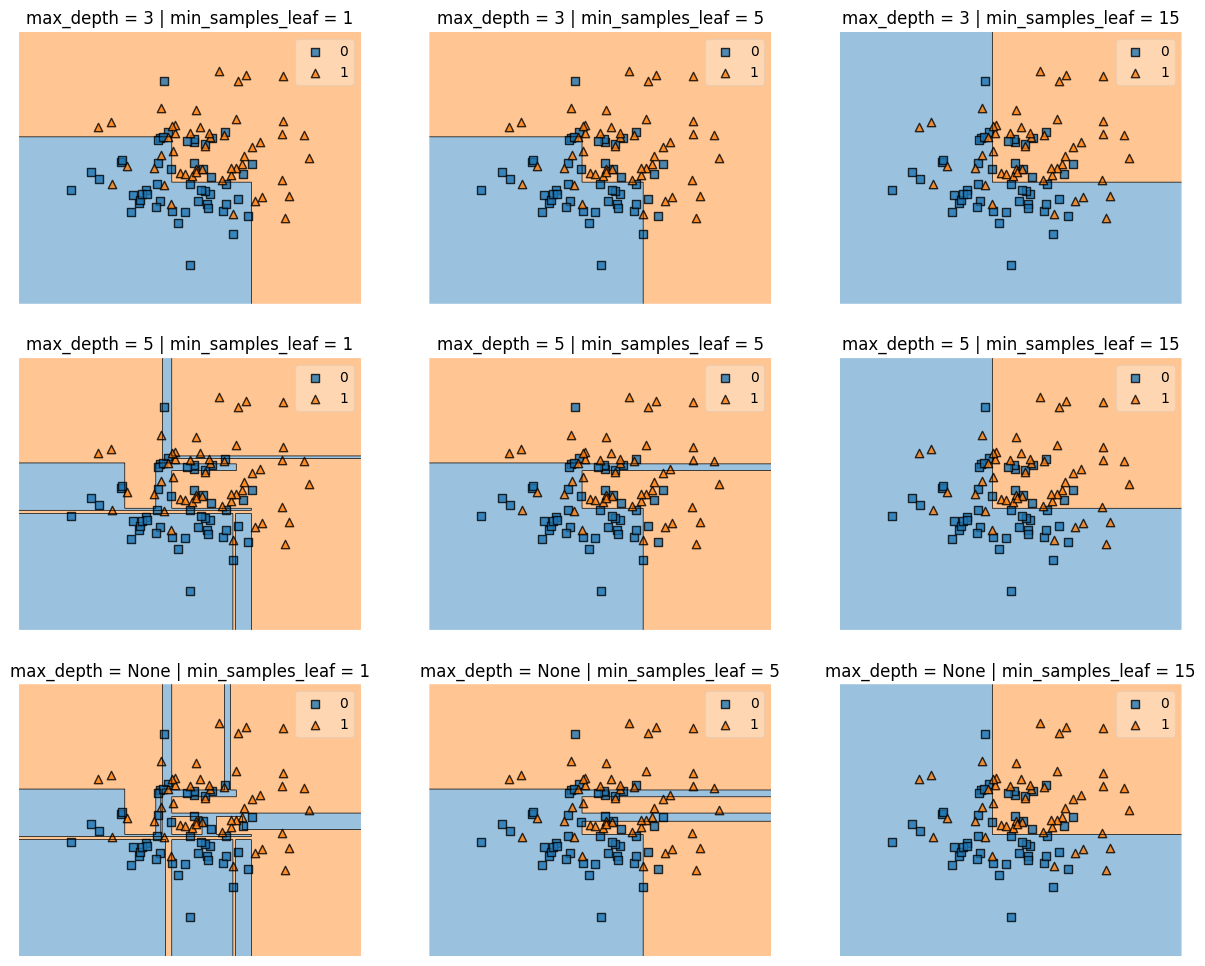

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Accuracy: 0.74


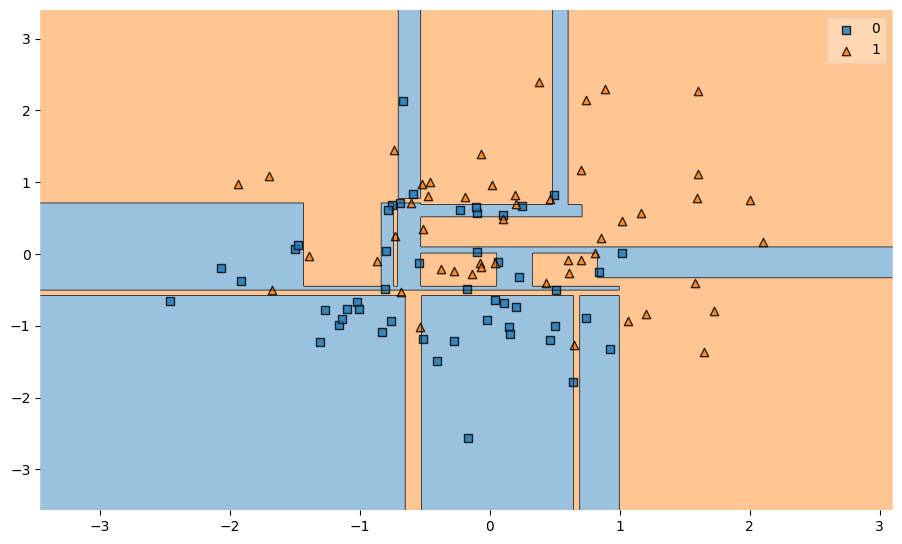

In [ ]:
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
model.fit(X, y)

print(f"Accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, model)
plt.show()

### Неустойчивость  <a name="unstable"></a>

Как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки из исходной?

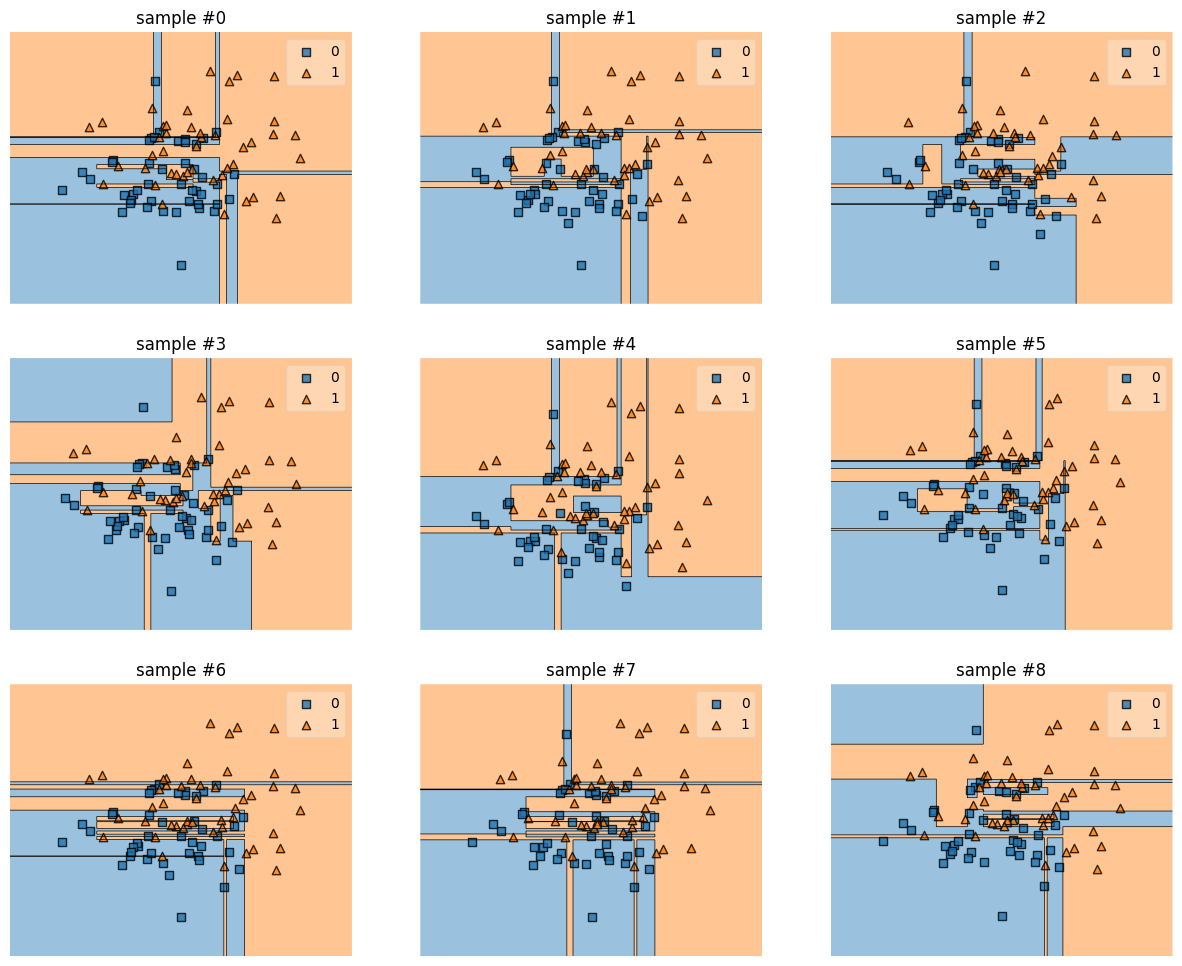

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

### Датасет  <a name="dataset"></a>

Построим решающее дерево для какого-нибудь набора данных.

In [ ]:
import pandas as pd

In [ ]:
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv" ,sep=",")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
mean_data = []
for i in boston.columns:
    mean_data.append(np.ceil(np.mean(boston[str(i)])))

In [ ]:
X = boston.iloc[:, :-1].values
y = boston.iloc[:, -1].values

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(f"Shape: {X.shape}")


Shape: (506, 13)


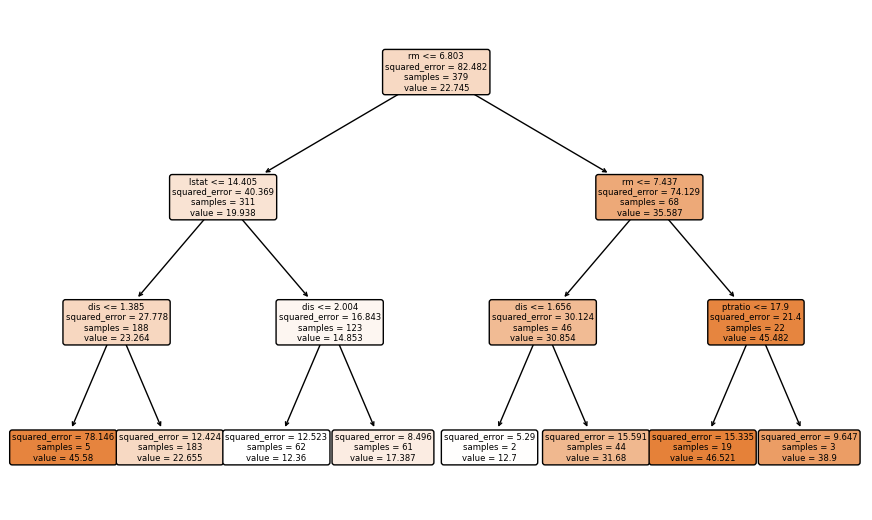

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=13)
tree.fit(X_train, y_train)

plot_tree(tree, feature_names=boston.columns, filled=True, rounded=True)
plt.show()

In [ ]:
round(mean_squared_error(y_test, tree.predict(X_test)), 1)

37.7

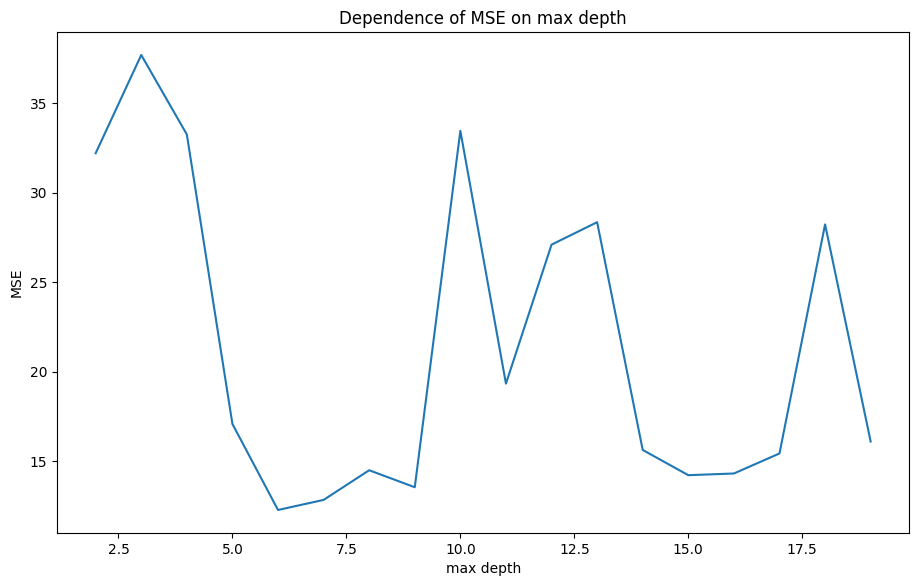

In [ ]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    tree.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, tree.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [ ]:
pd.DataFrame({"max_depth": max_depth_array,"MSE": mse_array}).sort_values(by="MSE").reset_index(drop=True)[:5]

,max_depth,MSE
0,6,12.259769
1,7,12.822513
2,9,13.531328
3,15,14.205564
4,16,14.299599


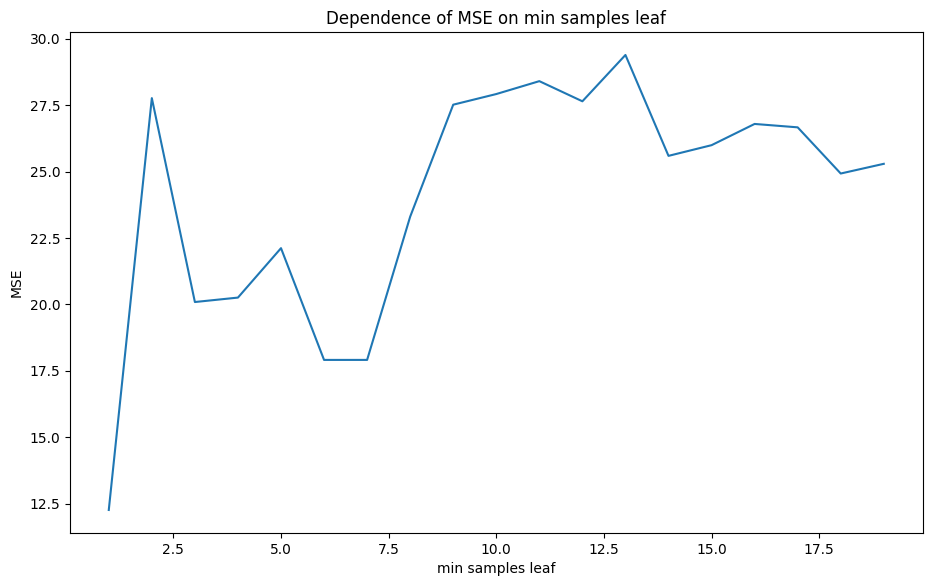

In [ ]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

In [ ]:
pd.DataFrame({"min_samples_leaf": min_samples_leaf_array,"MSE": mse_array}).sort_values(by="MSE").reset_index(drop=True)[:5]

,min_samples_leaf,MSE
0,1,12.259769
1,6,17.908766
2,7,17.909083
3,3,20.088437
4,4,20.255276


In [ ]:
from sklearn.model_selection import GridSearchCV

params={"max_depth":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}
gr=GridSearchCV(DecisionTreeRegressor(),params,cv=3,scoring="r2")
gr.fit(X,y)
gr.best_estimator_,gr.best_score_

(DecisionTreeRegressor(max_depth=6, min_samples_leaf=5), 0.5383325442388726)

## Бонус: решающее дерево своими руками

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

_Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины._

In [ ]:
X=pd.DataFrame(X,columns=boston.columns[:-1])

In [ ]:

X["target"] = y

X_train, X_test = train_test_split(X, test_size=0.25, random_state=13)

In [ ]:
from typing import Iterable, List, Tuple

def H(R: pd.DataFrame) -> float:
    """
    Compute impurity criterion for a fixed set of objects R.
    Last column is assumed to contain target value
    """
    return R["target"].var()


def split_node(R_m: np.ndarray, feature: str, t: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Split a fixed set of objects R_m given feature number and threshold t
    """
    mask = R_m[feature] <= t
    return R_m.loc[mask], R_m.loc[~mask]


def q_error(R_m: np.ndarray, feature: str, t: float) -> float:
    """
    Compute error criterion for given split parameters
    """
    R_l, R_r = split_node(R_m, feature, t)
    return len(R_l) / len(R_m) * H(R_l) + len(R_r) / len(R_m) * H(R_r)

_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

In [ ]:
boston.columns[0:13]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [ ]:
boston.columns[:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

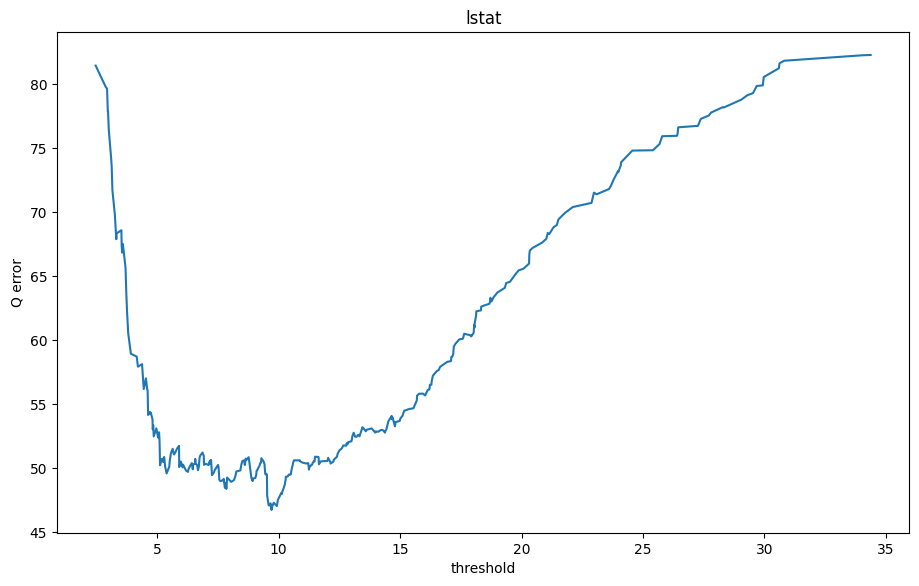

In [ ]:
feature = "lstat"
Q_array = []

feature_values = np.unique(X_train[feature])
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))

plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [ ]:
def get_optimal_split(R_m: np.array, feature: str) -> Tuple[float, List[float]]:
    Q_array = []
    feature_values = np.unique(R_m[feature])

    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))

    Q_array = np.nan_to_num(Q_array, nan=float("+inf"))

    opt_threshold = feature_values[np.argmin(Q_array)]

    return opt_threshold, Q_array

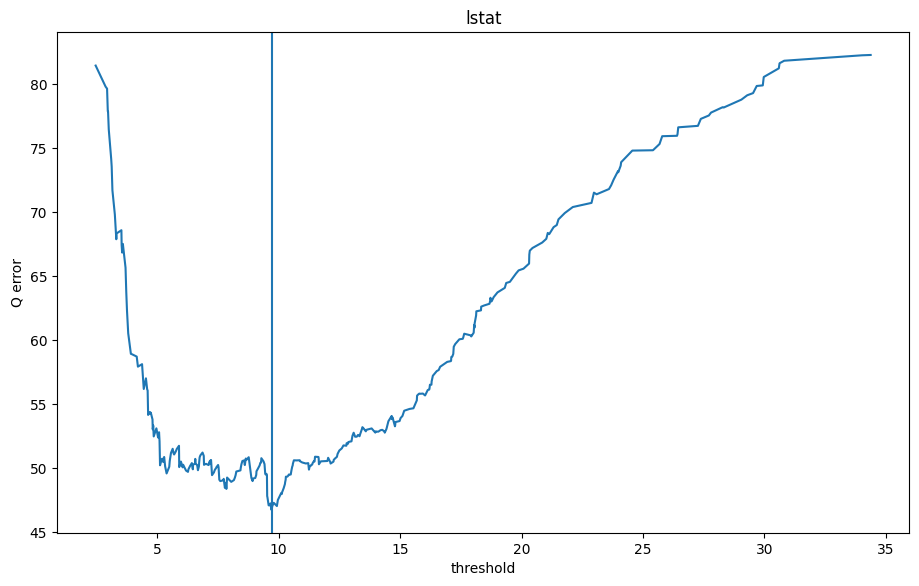

In [ ]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature]), Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.axvline(x=t)
plt.show()

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

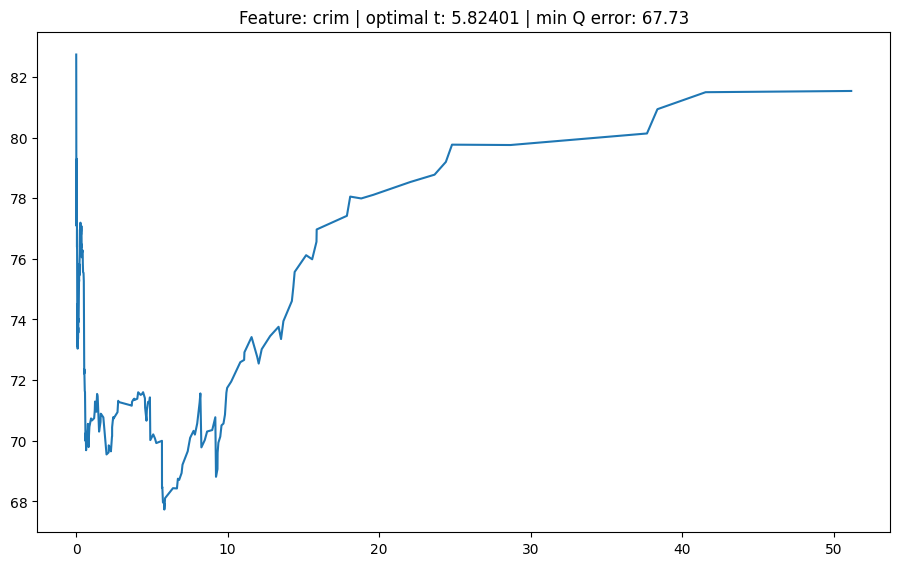

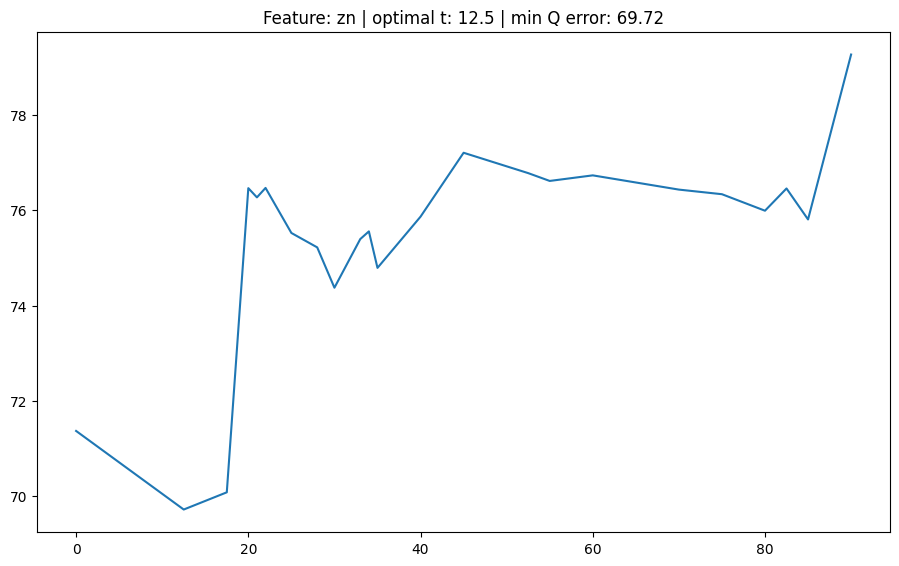

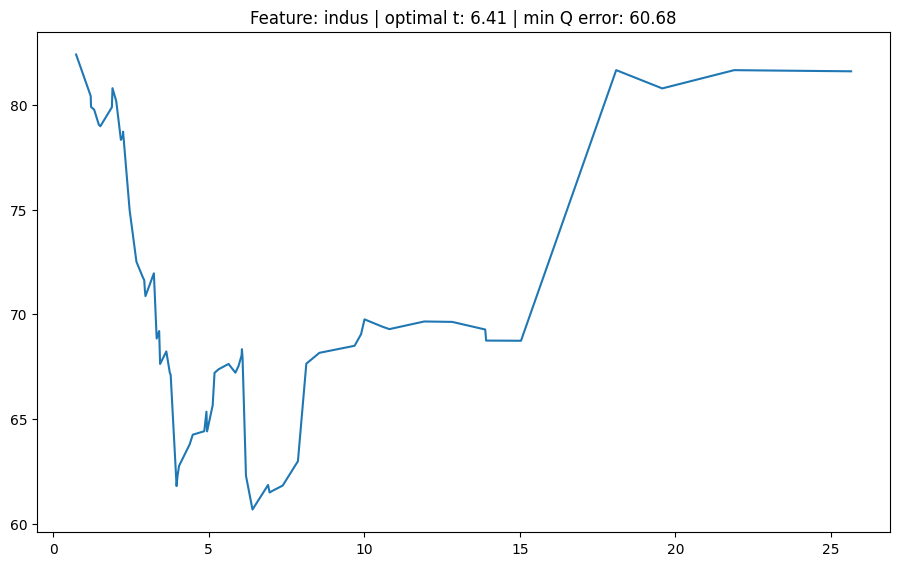

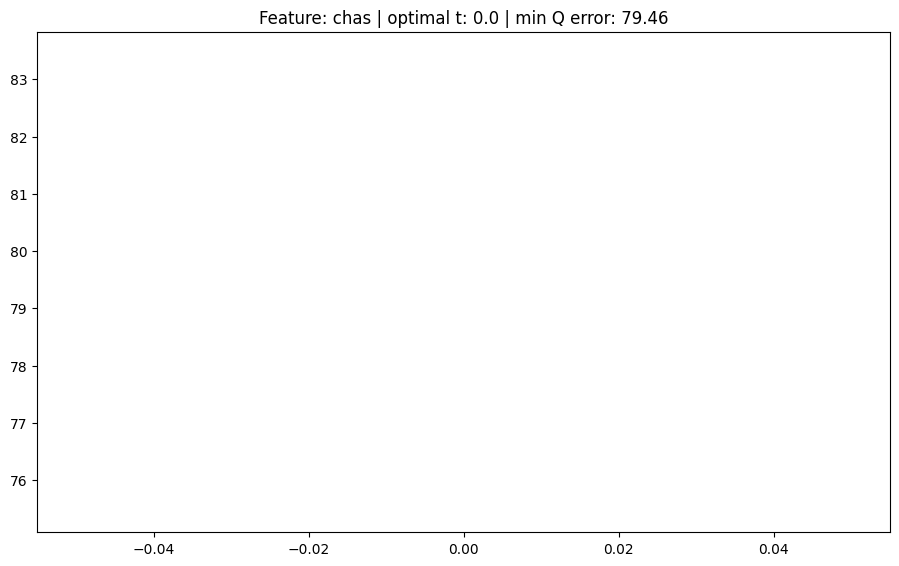

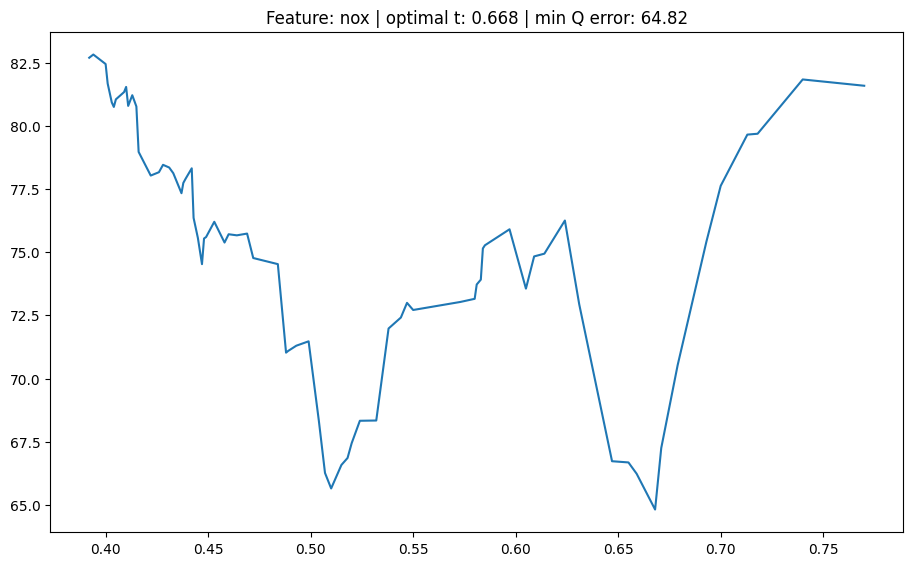

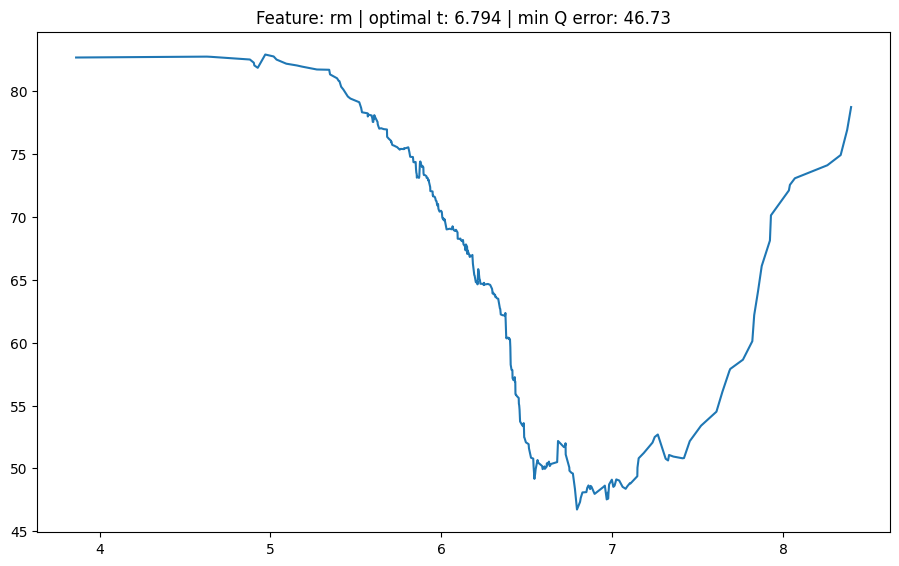

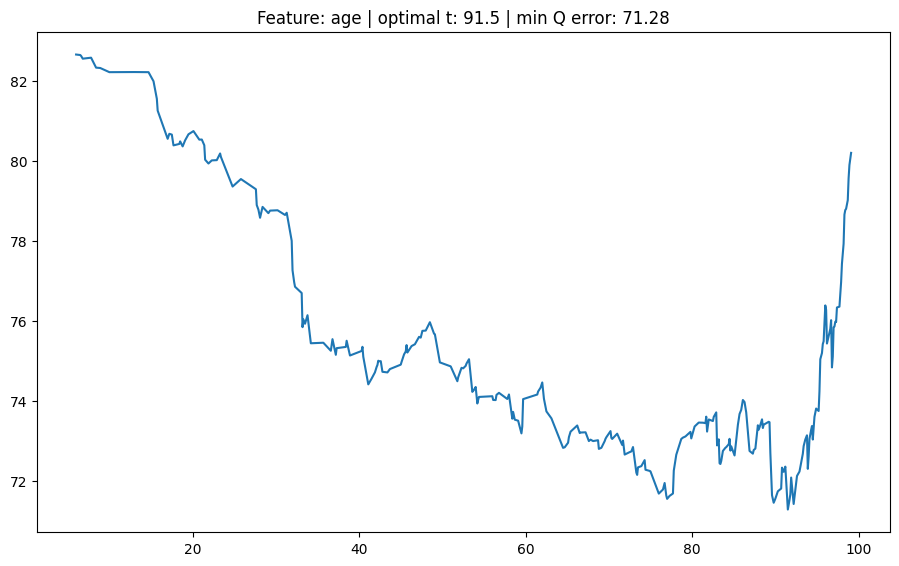

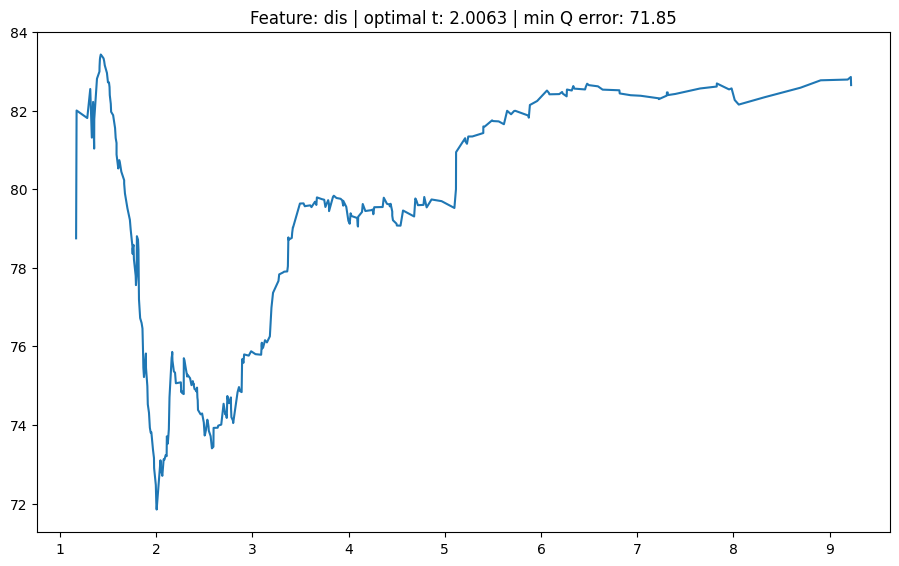

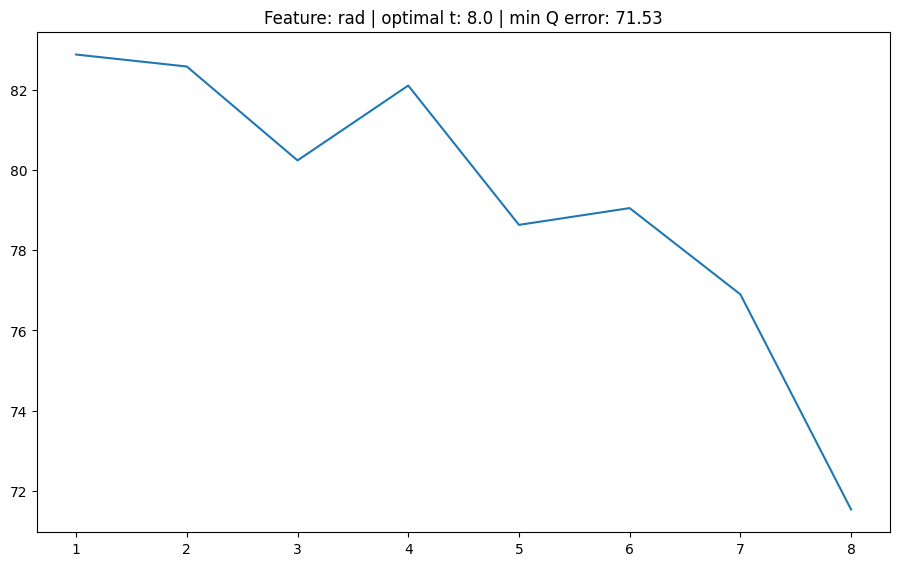

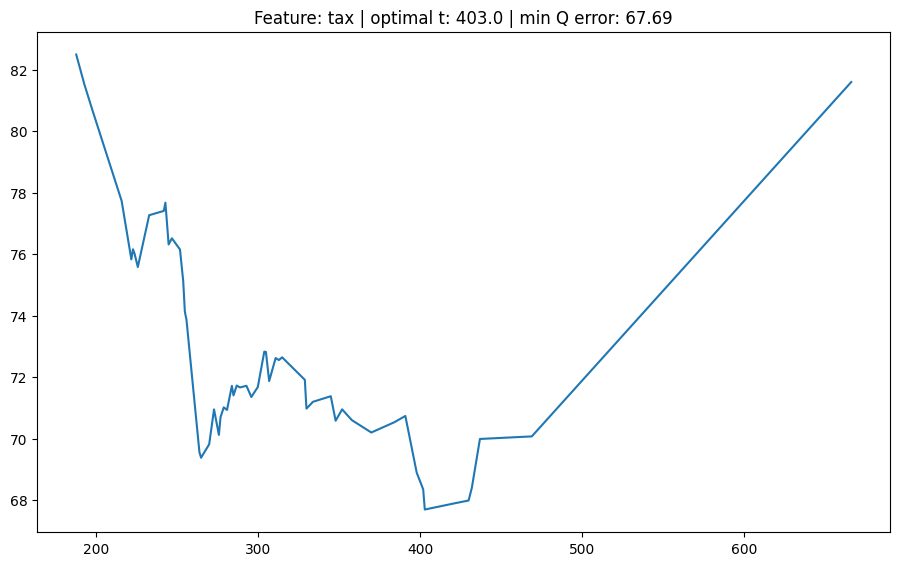

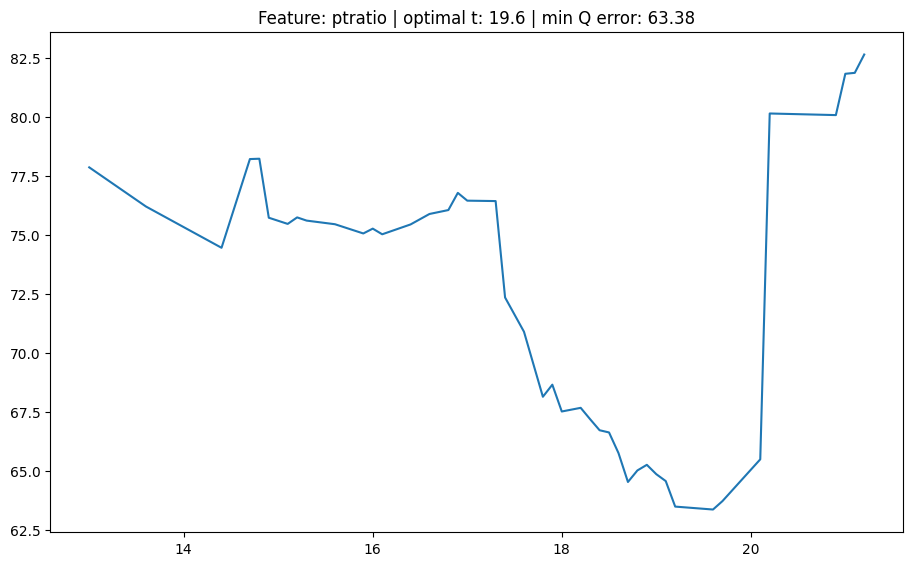

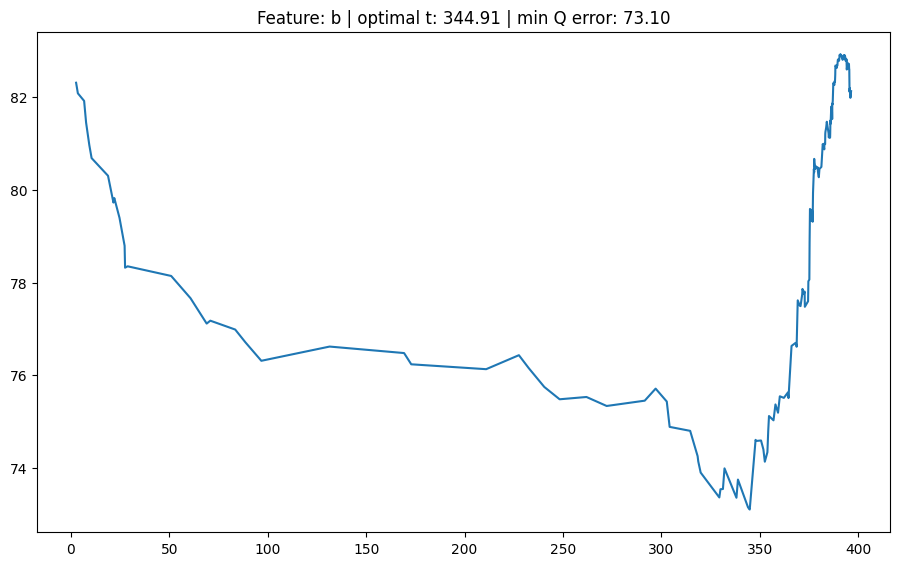

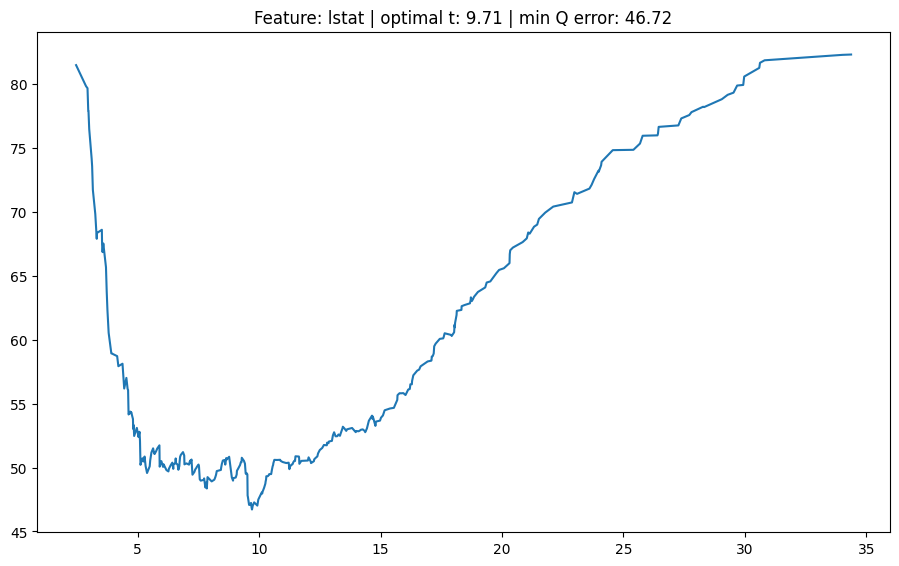

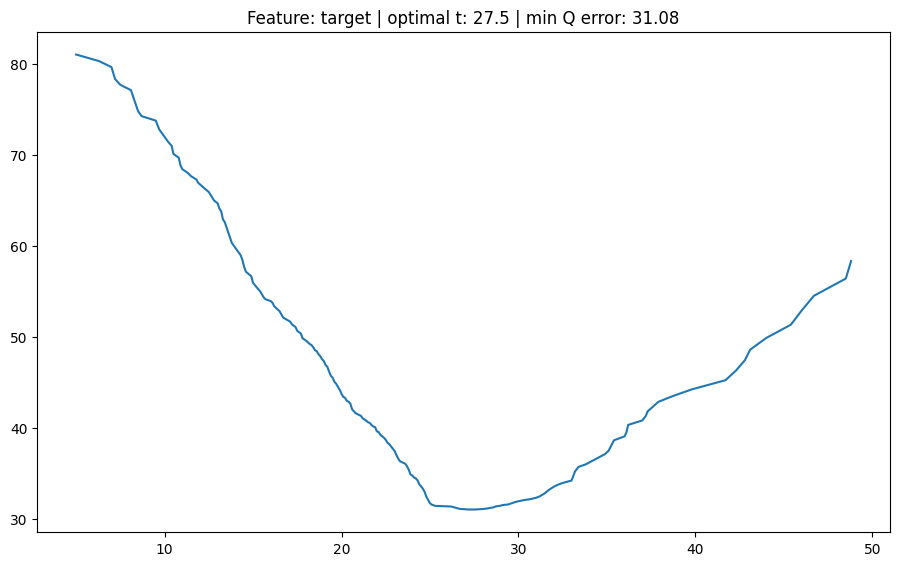

[('target', 27.5, 31.076842051873854),
 ('lstat', 9.71, 46.71578926625974),
 ('rm', 6.794, 46.73151006817983),
 ('indus', 6.41, 60.679814320810095),
 ('ptratio', 19.6, 63.38235163124333),
 ('nox', 0.668, 64.82160091734985),
 ('tax', 403.0, 67.69401458031751),
 ('crim', 5.82401, 67.73396285468317),
 ('zn', 12.5, 69.71950632098546),
 ('age', 91.5, 71.28166496609492),
 ('rad', 8.0, 71.52693129585947),
 ('dis', 2.0063, 71.8487495757931),
 ('b', 344.91, 73.09628516456316),
 ('chas', 0.0, 79.46129728972997)]

In [ ]:
results = []

for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title("Feature: {} | optimal t: {} | min Q error: {:.2f}".format(f, t, min_error))
    plt.plot(np.unique(X_train[f]), Q_array)
    plt.show()

results = sorted(results, key=lambda x: x[2])
results

In [ ]:
pd.DataFrame(results, columns=["feature", "optimal t", "min Q error"])

,feature,optimal t,min Q error
0,target,27.50000,31.076842
1,lstat,9.71000,46.715789
2,rm,6.79400,46.731510
3,indus,6.41000,60.679814
4,ptratio,19.60000,63.382352
5,nox,0.66800,64.821601
6,tax,403.00000,67.694015
7,crim,5.82401,67.733963
8,zn,12.50000,69.719506
9,age,91.50000,71.281665


In [ ]:
optimal_feature, optimal_t, optimal_error = results[11]

In [ ]:
print(optimal_feature)
print(optimal_t)
print(optimal_error)

dis
2.0063
71.8487495757931


_Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения. Почему это разбиение может быть лучшим? Как вы можете интерпретировать результат?_

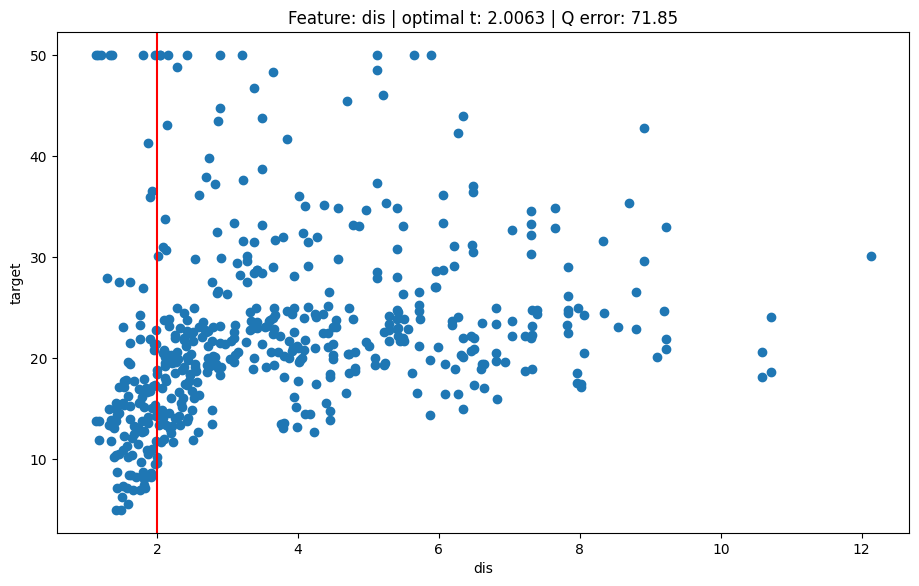

In [ ]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel("target")
plt.title("Feature: {} | optimal t: {} | Q error: {:.2f}".format(optimal_feature, optimal_t, optimal_error))
plt.show()